<a href="https://colab.research.google.com/github/MSchum19/MSchum19_64061/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary:
Some models underperformed compared to others, but there was not a model that stood definitively above all of the others.  

The complex models (2+ representation layers, over 16 units per layer) seemed to perform best on the training data, but not on the test data.  For this data set, the simpler models (1 layer, 8 units per layer) were a bit more robust, and often performed better on the test data.

I found using 1 representation layer with 16 units to be the best choice.

I tried several additional models to see if any trends emerged.

Other observations included the relatively poor performance of the tanh activation function, and the very low loss value of the MSE loss function, even with the mediocre accuracy it provided. Also, using the dropout regularization technique tended to result it better validation accuracy but I was not able to get better results overall on test data.


In [172]:
import pandas as pd

# Summary table
data = {
    "Layers (representation only)": [1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1],
    "Units": [16, 32, 16, 16, 16, 4, 8, 32, 16, 8, 4],
    "Special": ["-","-","MSE loss","tanh","dropout", "dropout", "dropout", "dropout", "dropout", "dropout", "dropout"],
    "Epochs": [5, 3, 5, 3, 6, 3, 7, 6, 7, 7, 12],
    "Loss": [0.279, 0.317, 0.106, 0.460, 0.446, 0.472, 0.367, 0.473, 0.328, 0.289, 0.321],
    "Accuracy": [0.888, 0.871, 0.867, 0.858, 0.872, 0.881, 0.875, 0.873, 0.879, 0.883, 0.878]

}

# Create a data frame
df = pd.DataFrame(data)

# Display the data frame
print(df)

    Layers (representation only)  Units   Special  Epochs   Loss  Accuracy
0                              1     16         -       5  0.279     0.888
1                              2     32         -       3  0.317     0.871
2                              2     16  MSE loss       5  0.106     0.867
3                              2     16      tanh       3  0.460     0.858
4                              2     16   dropout       6  0.446     0.872
5                              2      4   dropout       3  0.472     0.881
6                              2      8   dropout       7  0.367     0.875
7                              2     32   dropout       6  0.473     0.873
8                              1     16   dropout       7  0.328     0.879
9                              1      8   dropout       7  0.289     0.883
10                             1      4   dropout      12  0.321     0.878


# **1.** Here is the IMDB classification task using just **one representation layer**, instead of two.

In [104]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
          results[i, j] = 1.
    return results

In [105]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model will be built with just one representation layer, and one final classification layer.

In [106]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [107]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [108]:
# Splitting the training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [109]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6949 - loss: 0.5866 - val_accuracy: 0.8436 - val_loss: 0.4163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8884 - loss: 0.3534 - val_accuracy: 0.8789 - val_loss: 0.3333
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9224 - loss: 0.2618 - val_accuracy: 0.8868 - val_loss: 0.2996
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9299 - loss: 0.2259 - val_accuracy: 0.8867 - val_loss: 0.2888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9431 - loss: 0.1902 - val_accuracy: 0.8862 - val_loss: 0.2844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9493 - loss: 0.1745 - val_accuracy: 0.8868 - val_loss: 0.2758
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9532 - loss: 0.1509 - val_accuracy: 0.8854 - val_loss: 0.2864
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9615 - loss: 0.1355 - val_accuracy: 0.8871 - v

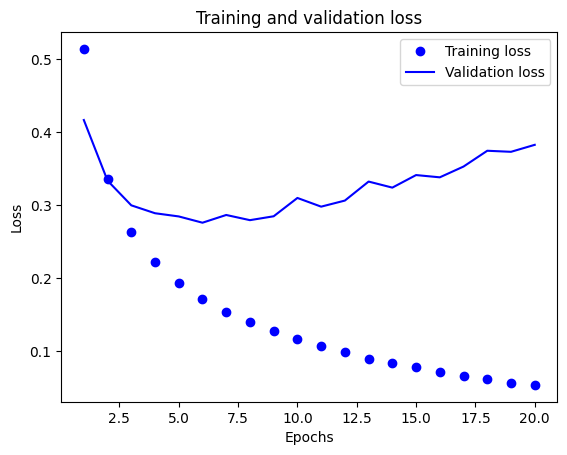

In [110]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

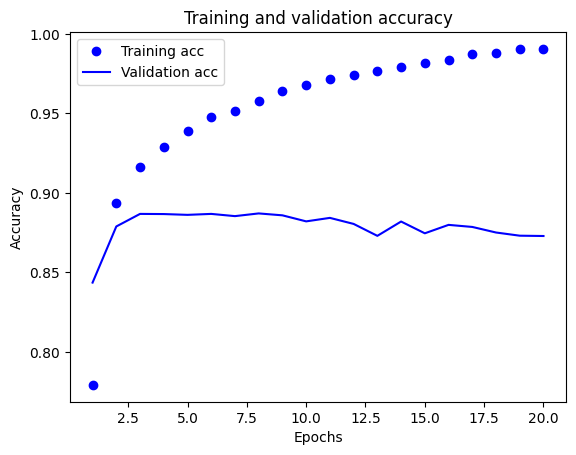

In [111]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation loss and accuracy appear to optimize at approximately the **5th epoch**.  The model can be retrained for 5 epochs, one activation layer, and one classification layer, then evaluated on the test data:

In [112]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7435 - loss: 0.5510
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9016 - loss: 0.3071
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9182 - loss: 0.2408
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.2049
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9385 - loss: 0.1854
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8863 - loss: 0.2806


In [113]:
results

[0.27903759479522705, 0.8882399797439575]

The final results for using one representation layer and 5 epochs are an **accuracy of 0.882 and a loss value of 0.279.**



---



# **2.** Here is the IMDB classification task using **32 units in each representation layer**, instead of **16**. Two representation layers and one classification layer will be used.

In [114]:
# Building the model
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [115]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [116]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6793 - loss: 0.6051 - val_accuracy: 0.8369 - val_loss: 0.4174
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8904 - loss: 0.3388 - val_accuracy: 0.8796 - val_loss: 0.3121
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9121 - loss: 0.2489 - val_accuracy: 0.8877 - val_loss: 0.2786
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9359 - loss: 0.1905 - val_accuracy: 0.8718 - val_loss: 0.3198
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9427 - loss: 0.1630 - val_accuracy: 0.8831 - val_loss: 0.2910
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9552 - loss: 0.1348 - val_accuracy: 0.8855 - val_loss: 0.2889
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9644 - loss: 0.1125 - val_accuracy: 0.8818 - val_loss: 0.3042
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9710 - loss: 0.0929 - val_accuracy: 0.8772 - v

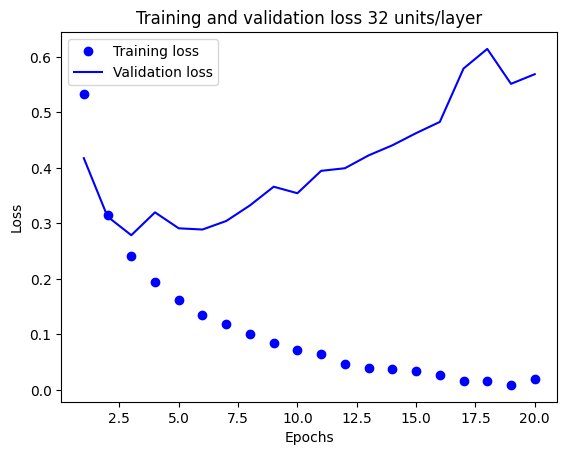

In [117]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss 32 units/layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

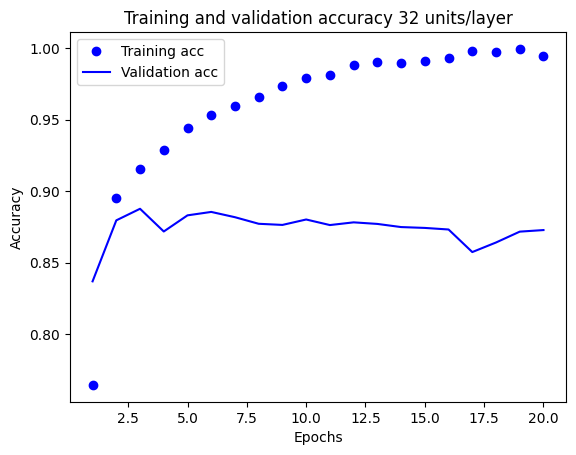

In [118]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy 32 units/layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation loss and accuracy appear to optimize at approximately the **3rd epoch**.  The model can be retrained for 3 epochs, 32 units, two activation layers, and one classification layer, then evaluated on the test data:

In [119]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7207 - loss: 0.5504
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9019 - loss: 0.2715
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9261 - loss: 0.2063
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8709 - loss: 0.3148


In [120]:
results

[0.31669163703918457, 0.8712400197982788]

The final results for using 32 units, two representation layers and 3 epochs are an **accuracy of 0.871 and a loss value of 0.317.**



---



# 3. Now the **MSE** loss function will be applied in place of the binary_crossentropy loss function.

In [121]:
# Building the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [122]:
# Compiling the model with the MSE loss function
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [123]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7016 - loss: 0.2107 - val_accuracy: 0.8516 - val_loss: 0.1335
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8772 - loss: 0.1142 - val_accuracy: 0.8624 - val_loss: 0.1106
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9124 - loss: 0.0816 - val_accuracy: 0.8866 - val_loss: 0.0896
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9273 - loss: 0.0652 - val_accuracy: 0.8850 - val_loss: 0.0858
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9349 - loss: 0.0574 - val_accuracy: 0.8849 - val_loss: 0.0835
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9498 - loss: 0.0475 - val_accuracy: 0.8809 - val_loss: 0.0871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9546 - loss: 0.0429 - val_accuracy: 0.8868 - val_loss: 0.0846
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9600 - loss: 0.0383 - val_accuracy: 0.8809 - v

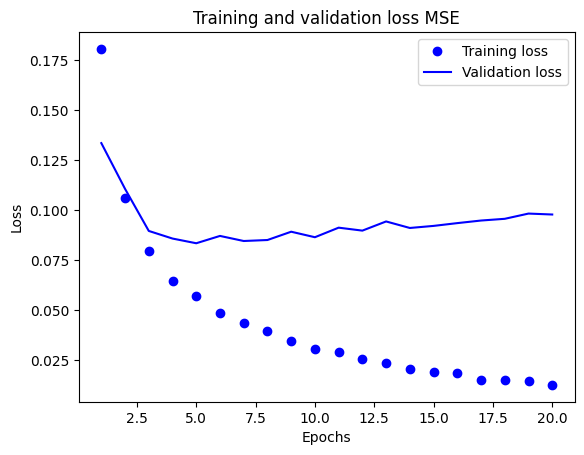

In [124]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

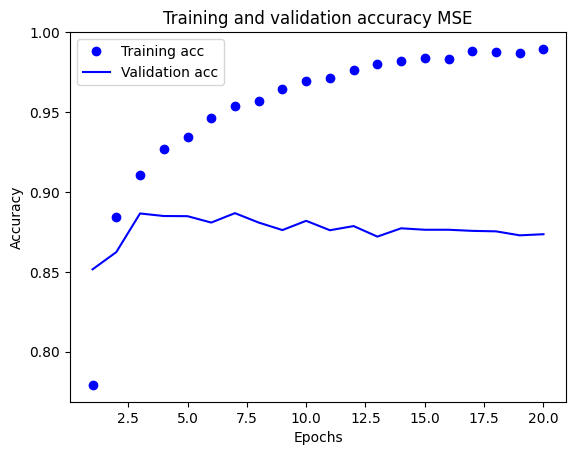

In [125]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy MSE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation loss and accuracy appear to optimize at approximately the 5th epoch using the MSE loss function. The model can be retrained for 5 epochs, two activation layers, 16 units, and one classification layer, then evaluated on the test data:

In [126]:
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9446 - loss: 0.0470
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9593 - loss: 0.0374
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9648 - loss: 0.0321
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9704 - loss: 0.0283
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9713 - loss: 0.0278
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8628 - loss: 0.1082


[0.10566967725753784, 0.8666399717330933]

Using the MSE loss function with two activation layers of 16 units each with 6 epochs shows an accuracy value of .867 and a loss value of .106.  While MSE does not show the highest accuracy compared to other loss functions, it is remarkable how low the loss value is compared to other loss functions.



---

# 4. Now the **tanh** activation method will be applied in place of relu.

In [127]:
# Building the model
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [128]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [129]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7276 - loss: 0.5585 - val_accuracy: 0.8747 - val_loss: 0.3570
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9057 - loss: 0.2968 - val_accuracy: 0.8830 - val_loss: 0.2962
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9293 - loss: 0.2145 - val_accuracy: 0.8903 - val_loss: 0.2691
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9427 - loss: 0.1683 - val_accuracy: 0.8817 - val_loss: 0.2971
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9598 - loss: 0.1249 - val_accuracy: 0.8824 - val_loss: 0.3114
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9691 - loss: 0.1005 - val_accuracy: 0.8672 - val_loss: 0.3672
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9685 - loss: 0.0928 - val_accuracy: 0.8656 - val_loss: 0.3852
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9817 - loss: 0.0647 - val_accuracy: 0.8778 - 

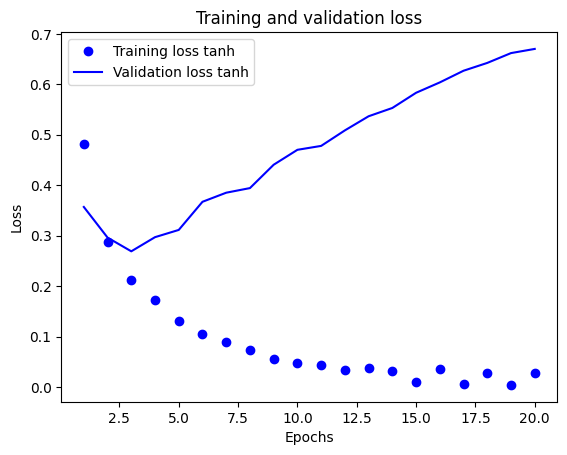

In [130]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss tanh')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss tanh')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

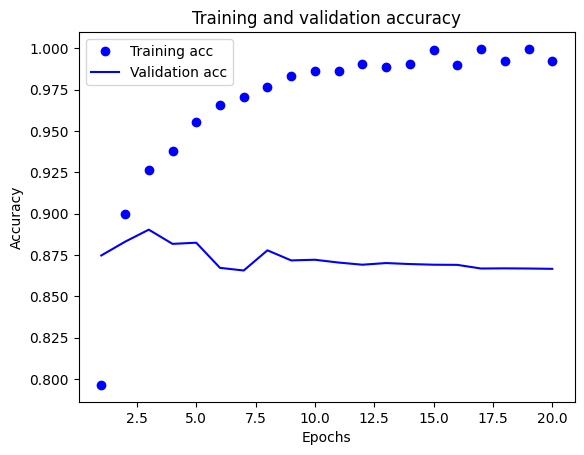

In [131]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Using the tanh activation function, the accuracy and loss is optimized after 3 epochs on the validation set.

In [132]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9438 - loss: 0.2639
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9639 - loss: 0.1260
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9648 - loss: 0.1101
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8554 - loss: 0.4686


[0.4603240489959717, 0.8580399751663208]

The tanh activation function performed worse than the relu function, with an accuracy of .858 and a much larger loss of 0.460.  The tanh activation function appears to be overfitting the training data; it shows very high accuracy and low loss values on the training data, but the results on the test data are not as high as other activation functions.



---
# 5. Now the **dropout** regularization technique will be applied, using 16 units, 2 representation layers, and the rmsprop loss function.


In [133]:
# building the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [134]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [135]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5717 - loss: 0.6730 - val_accuracy: 0.6202 - val_loss: 0.5851
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7622 - loss: 0.5685 - val_accuracy: 0.7977 - val_loss: 0.5152
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8405 - loss: 0.5087 - val_accuracy: 0.8255 - val_loss: 0.4780
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8776 - loss: 0.4608 - val_accuracy: 0.8655 - val_loss: 0.4457
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8995 - loss: 0.4263 - val_accuracy: 0.8845 - val_loss: 0.4082
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9093 - loss: 0.3820 - val_accuracy: 0.8802 - val_loss: 0.3904
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9181 - loss: 0.3450 - val_accuracy: 0.8866 - val_loss: 0.3570
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9265 - loss: 0.3108 - val_accuracy: 0.8796 - v

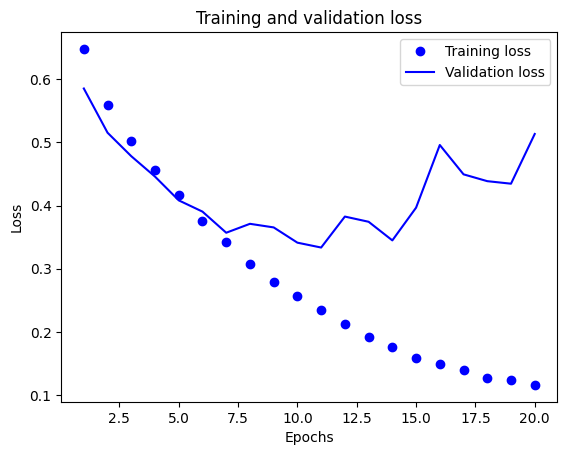

In [136]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

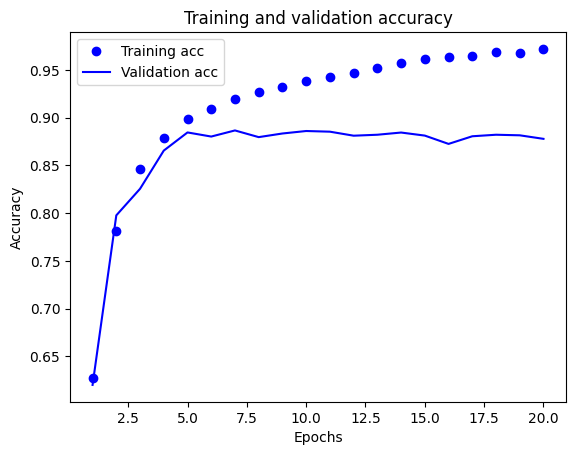

In [137]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With dropout applied, 6 epochs shows the best values for accuracy and loss.

In [138]:
model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9221 - loss: 0.2679
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9329 - loss: 0.2294
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9416 - loss: 0.2005
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9469 - loss: 0.1850
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9481 - loss: 0.1763
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9518 - loss: 0.1625
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8689 - loss: 0.4445


[0.44635409116744995, 0.872160017490387]



---



5. Attempting to simplify the model by reducing the units in each layer to 4.

In [139]:
# building the model
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [140]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [141]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5252 - loss: 0.6882 - val_accuracy: 0.7873 - val_loss: 0.6566
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5828 - loss: 0.6623 - val_accuracy: 0.8241 - val_loss: 0.6354
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6101 - loss: 0.6464 - val_accuracy: 0.8438 - val_loss: 0.6096
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6270 - loss: 0.6353 - val_accuracy: 0.8372 - val_loss: 0.5884
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6333 - loss: 0.6241 - val_accuracy: 0.8675 - val_loss: 0.5791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6365 - loss: 0.6182 - val_accuracy: 0.8656 - val_loss: 0.5549
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6369 - loss: 0.6136 - val_accuracy: 0.8753 - val_loss: 0.5515
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6457 - loss: 0.6060 - val_accuracy: 0.8739 - v

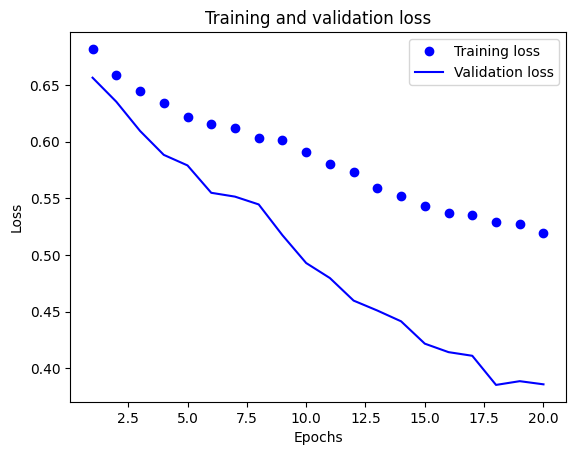

In [142]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation loss is better than training (!).  As is validation accuracy below.

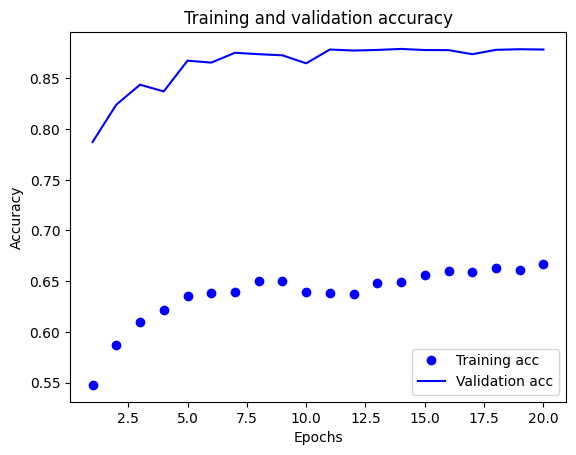

In [143]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [144]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5429 - loss: 0.6735
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6606 - loss: 0.6052
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7113 - loss: 0.5632


In [145]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8801 - loss: 0.4729


In [146]:
results

[0.472202330827713, 0.8812400102615356]



---



another attempt with 8 units and dropout

In [147]:
# building the model
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [148]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [149]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5586 - loss: 0.6756 - val_accuracy: 0.8032 - val_loss: 0.5751
Epoch 2/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6889 - loss: 0.5831 - val_accuracy: 0.8477 - val_loss: 0.4981
Epoch 3/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7417 - loss: 0.5247 - val_accuracy: 0.8673 - val_loss: 0.4535
Epoch 4/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7871 - loss: 0.4802 - val_accuracy: 0.8792 - val_loss: 0.3923
Epoch 5/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8079 - loss: 0.4435 - val_accuracy: 0.8839 - val_loss: 0.3631
Epoch 6/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8282 - loss: 0.4116 - val_accuracy: 0.8796 - val_loss: 0.3416
Epoch 7/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8407 - loss: 0.3914 - val_accuracy: 0.8866 - val_loss: 0.3211
Epoch 8/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8566 - loss: 0.3645 - val_accuracy: 0.8815 - v

In [150]:
model.fit(x_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8671 - loss: 0.3490
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8763 - loss: 0.3307
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8832 - loss: 0.3149
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8842 - loss: 0.3096
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8919 - loss: 0.2893
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8974 - loss: 0.2800
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8973 - loss: 0.2723
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8730 - loss: 0.3648


In [151]:
results

[0.3668724298477173, 0.8754799962043762]



---



Another attempt with 32 units and dropout

In [152]:
# building the model
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [153]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [154]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5898 - loss: 0.6618 - val_accuracy: 0.8486 - val_loss: 0.4806
Epoch 2/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7973 - loss: 0.4873 - val_accuracy: 0.8742 - val_loss: 0.3582
Epoch 3/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8579 - loss: 0.3796 - val_accuracy: 0.8854 - val_loss: 0.3024
Epoch 4/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8921 - loss: 0.3026 - val_accuracy: 0.8884 - val_loss: 0.2839
Epoch 5/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9172 - loss: 0.2486 - val_accuracy: 0.8906 - val_loss: 0.2737
Epoch 6/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9288 - loss: 0.2189 - val_accuracy: 0.8860 - val_loss: 0.2799
Epoch 7/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9432 - loss: 0.1754 - val_accuracy: 0.8867 - val_loss: 0.2868
Epoch 8/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9496 - loss: 0.1555 - val_accuracy: 0.8862 - v

In [155]:
model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9400 - loss: 0.1911
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9471 - loss: 0.1634
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9556 - loss: 0.1423
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9615 - loss: 0.1209
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9667 - loss: 0.1073
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9702 - loss: 0.0941
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8703 - loss: 0.4777


In [156]:
results

[0.4730146527290344, 0.872759997844696]



---

An attempt with 1 layer, 16 units:

In [157]:
# building the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [158]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [159]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6753 - loss: 0.6062 - val_accuracy: 0.8630 - val_loss: 0.4278
Epoch 2/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8385 - loss: 0.4165 - val_accuracy: 0.8783 - val_loss: 0.3522
Epoch 3/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8752 - loss: 0.3408 - val_accuracy: 0.8832 - val_loss: 0.3148
Epoch 4/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8967 - loss: 0.2866 - val_accuracy: 0.8883 - val_loss: 0.2931
Epoch 5/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9095 - loss: 0.2548 - val_accuracy: 0.8846 - val_loss: 0.2905
Epoch 6/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9224 - loss: 0.2330 - val_accuracy: 0.8881 - val_loss: 0.2790
Epoch 7/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9284 - loss: 0.2155 - val_accuracy: 0.8897 - val_loss: 0.2723
Epoch 8/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9419 - loss: 0.1897 - val_accuracy: 0.8892 - v

In [160]:
model.fit(x_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9278 - loss: 0.2102
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9392 - loss: 0.1829
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9469 - loss: 0.1703
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9495 - loss: 0.1585
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9556 - loss: 0.1443
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9575 - loss: 0.1360
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9607 - loss: 0.1269
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8774 - loss: 0.3306


In [161]:
results

[0.32845932245254517, 0.8791599869728088]



---

Attempt with 1 layer, 8 units

In [162]:
# building the model
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [163]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [164]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6080 - loss: 0.6557 - val_accuracy: 0.8411 - val_loss: 0.5289
Epoch 2/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7892 - loss: 0.5144 - val_accuracy: 0.8598 - val_loss: 0.4456
Epoch 3/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8201 - loss: 0.4432 - val_accuracy: 0.8744 - val_loss: 0.3907
Epoch 4/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8462 - loss: 0.3914 - val_accuracy: 0.8820 - val_loss: 0.3539
Epoch 5/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8647 - loss: 0.3533 - val_accuracy: 0.8862 - val_loss: 0.3267
Epoch 6/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8701 - loss: 0.3288 - val_accuracy: 0.8843 - val_loss: 0.3157
Epoch 7/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8807 - loss: 0.3010 - val_accuracy: 0.8889 - val_loss: 0.2981
Epoch 8/12
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8904 - loss: 0.2817 - val_accuracy: 0.8896 - v

In [165]:
model.fit(x_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8915 - loss: 0.2598
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8988 - loss: 0.2433
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9040 - loss: 0.2373
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9092 - loss: 0.2183
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9081 - loss: 0.2172
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9134 - loss: 0.2091
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9161 - loss: 0.1999
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8798 - loss: 0.2920


In [166]:
results

[0.28911659121513367, 0.8827599883079529]



---

Attempt with 1 layer, 4 units

In [167]:
# building the model
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [168]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [169]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=18,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5849 - loss: 0.6567 - val_accuracy: 0.8221 - val_loss: 0.5391
Epoch 2/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7348 - loss: 0.5370 - val_accuracy: 0.8617 - val_loss: 0.4689
Epoch 3/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7803 - loss: 0.4843 - val_accuracy: 0.8766 - val_loss: 0.4305
Epoch 4/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8144 - loss: 0.4438 - val_accuracy: 0.8827 - val_loss: 0.3930
Epoch 5/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8259 - loss: 0.4207 - val_accuracy: 0.8824 - val_loss: 0.3708
Epoch 6/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8474 - loss: 0.3939 - val_accuracy: 0.8837 - val_loss: 0.3573
Epoch 7/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8489 - loss: 0.3852 - val_accuracy: 0.8871 - val_loss: 0.3431
Epoch 8/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8660 - loss: 0.3636 - val_accuracy: 0.8877 - v

In [170]:
model.fit(x_train, y_train, epochs=12, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8722 - loss: 0.3320
Epoch 2/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8772 - loss: 0.3173
Epoch 3/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8852 - loss: 0.3025
Epoch 4/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8816 - loss: 0.3046
Epoch 5/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8909 - loss: 0.2885
Epoch 6/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8903 - loss: 0.2846
Epoch 7/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8938 - loss: 0.2779
Epoch 8/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8988 - loss: 0.2672
Epoch 9/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8969 - loss: 0.2680
Epoch 10/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8955 - loss: 0.2655
Epoch 11/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8929 - loss: 0.2645
Epoch 12/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy:

In [171]:
results

[0.32117849588394165, 0.8783599734306335]